In [1]:
import calendar

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from cycler import cycler

import pandas as pd
import numpy as np

custom_cycler = (cycler(color=['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'purple', 'pink', 'brown', 'orange', 'teal', 'coral', 'lightblue', 'lime', 'lavender', 'turquoise', 'darkgreen', 'tan', 'salmon', 'gold']))

In [2]:
df = pd.read_csv('libstats_2020.csv')#, index_col='interaction source')
df['epoch'] = pd.to_datetime(df['Timestamp'], format='%m/%d/%Y %H:%M:%S')

In [3]:
def autolabel(rects,ax):
    """
    Attach a text label above each bar in *rects*, displaying its height.
    https://matplotlib.org/3.3.2/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
    """
    ax = ax
    for rect in rects:
        height = rect.get_height()
        if not height == 0:
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        size=20,
                        ha='center', va='bottom')
        
    return ax

In [4]:
def get_monthly_totals(df,parameter):
    sub_dataframes = {}
    sources = df.groupby([parameter])
    source_names = set(sources.groups.keys())
    
    for source_name in source_names:
        sub_dataframes[source_name] = []
#         print(source_name)
        for _month in range(1,13):
#             print("month: "+str(_month))
            try:
                this_month = df.groupby(df.epoch.dt.month == _month).get_group(True)
                by_source = this_month.groupby(
                    this_month[parameter] == source_name
                )
                monthly_total = len(by_source.get_group(True))
            except KeyError:
                monthly_total = 0
#             print(monthly_total)
            sub_dataframes[source_name].append(monthly_total)
            
    print(sub_dataframes)
    return sub_dataframes

def monthly_source_totals_barchart(df,parameter):
    print(parameter)
    annual_totals = get_monthly_totals(df,parameter)
    
    # plot setup
    fig, ax = plt.subplots(figsize=(40, 20))
    fig.suptitle('Reference interactions by source - 2020',fontsize=70)
    fig.autofmt_xdate()
    fig.patch.set_facecolor('xkcd:sky blue')
    ax.set_prop_cycle(custom_cycler)
    ax.tick_params(axis='x', labelsize= 25)
    ax.tick_params(axis='y', labelsize= 25)
    ax.grid()
    plt.xticks(np.arange(12), calendar.month_name[1:13])
    plt.ylabel("Number of interactions",fontsize=40)

    # bar chart x-value spacing
#     spacer = len(annual_by_source.keys())
#     print(spacer)
    spacer = list(np.linspace(start=-1, stop=1.0, num=12))
    print(len(spacer))
    x = np.arange(12)
    width = 0.2
    sources = list(annual_totals.keys())
    sources.sort()
    for source in sources:
        print(source)
        rect = ax.bar(x+spacer[0], annual_totals[source], width, label=source,align='edge')#,linewidth=7)
        ax = autolabel(rect,ax)
        spacer.pop(0)

    ax.legend(prop={"size":40})
    fig.savefig('by_source_barchart.png')
#     plt.show()

    
def monthly_source_totals_linechart(df,parameter):
    annual_totals = get_monthly_totals(df,parameter)
    
    fig, ax = plt.subplots(figsize=(40, 20))
    fig.suptitle('Reference interactions by source - 2020',fontsize=70)
    fig.autofmt_xdate()
    fig.patch.set_facecolor('xkcd:sky blue')
    ax.set_prop_cycle(custom_cycler)
    ax.tick_params(axis='x', labelsize= 25)
    ax.tick_params(axis='y', labelsize= 25)
    ax.grid()
    plt.xticks(np.arange(12), calendar.month_name[1:13])
    plt.ylabel("Number of interactions",fontsize=40)
    
    sources = list(annual_totals.keys())
    sources.sort()
    for source in sources:
        ax.plot(annual_totals[source],linewidth=7,label=source)
        
    ax.legend(prop={"size":40})
    fig.savefig('by_source_linechart.png')
#     plt.show()

def monthly_source_types_linechart(df,parameter):
    annual_totals = get_monthly_totals(df,parameter)
    
    fig, ax = plt.subplots(figsize=(40, 20))
    fig.suptitle('Reference interactions by type - 2020',fontsize=70)
    fig.autofmt_xdate()
    fig.patch.set_facecolor('xkcd:sky blue')
    ax.set_prop_cycle(custom_cycler)
    ax.tick_params(axis='x', labelsize= 25)
    ax.tick_params(axis='y', labelsize= 25)
    ax.grid()
    plt.xticks(np.arange(12), calendar.month_name[1:13])
    plt.ylabel("Number of interactions",fontsize=40)
    
    types = list(annual_totals.keys())
    types.sort()
    for _type in types:
        ax.plot(annual_totals[_type],linewidth=7,label=_type)
        
    ax.legend(prop={"size":20})
    fig.savefig('by_type_linechart.png')
    
# monthly_source_totals_barchart(df,'interaction source')
# monthly_source_totals_linechart(df,'interaction source')
# monthly_source_types_linechart(df,'interaction type')

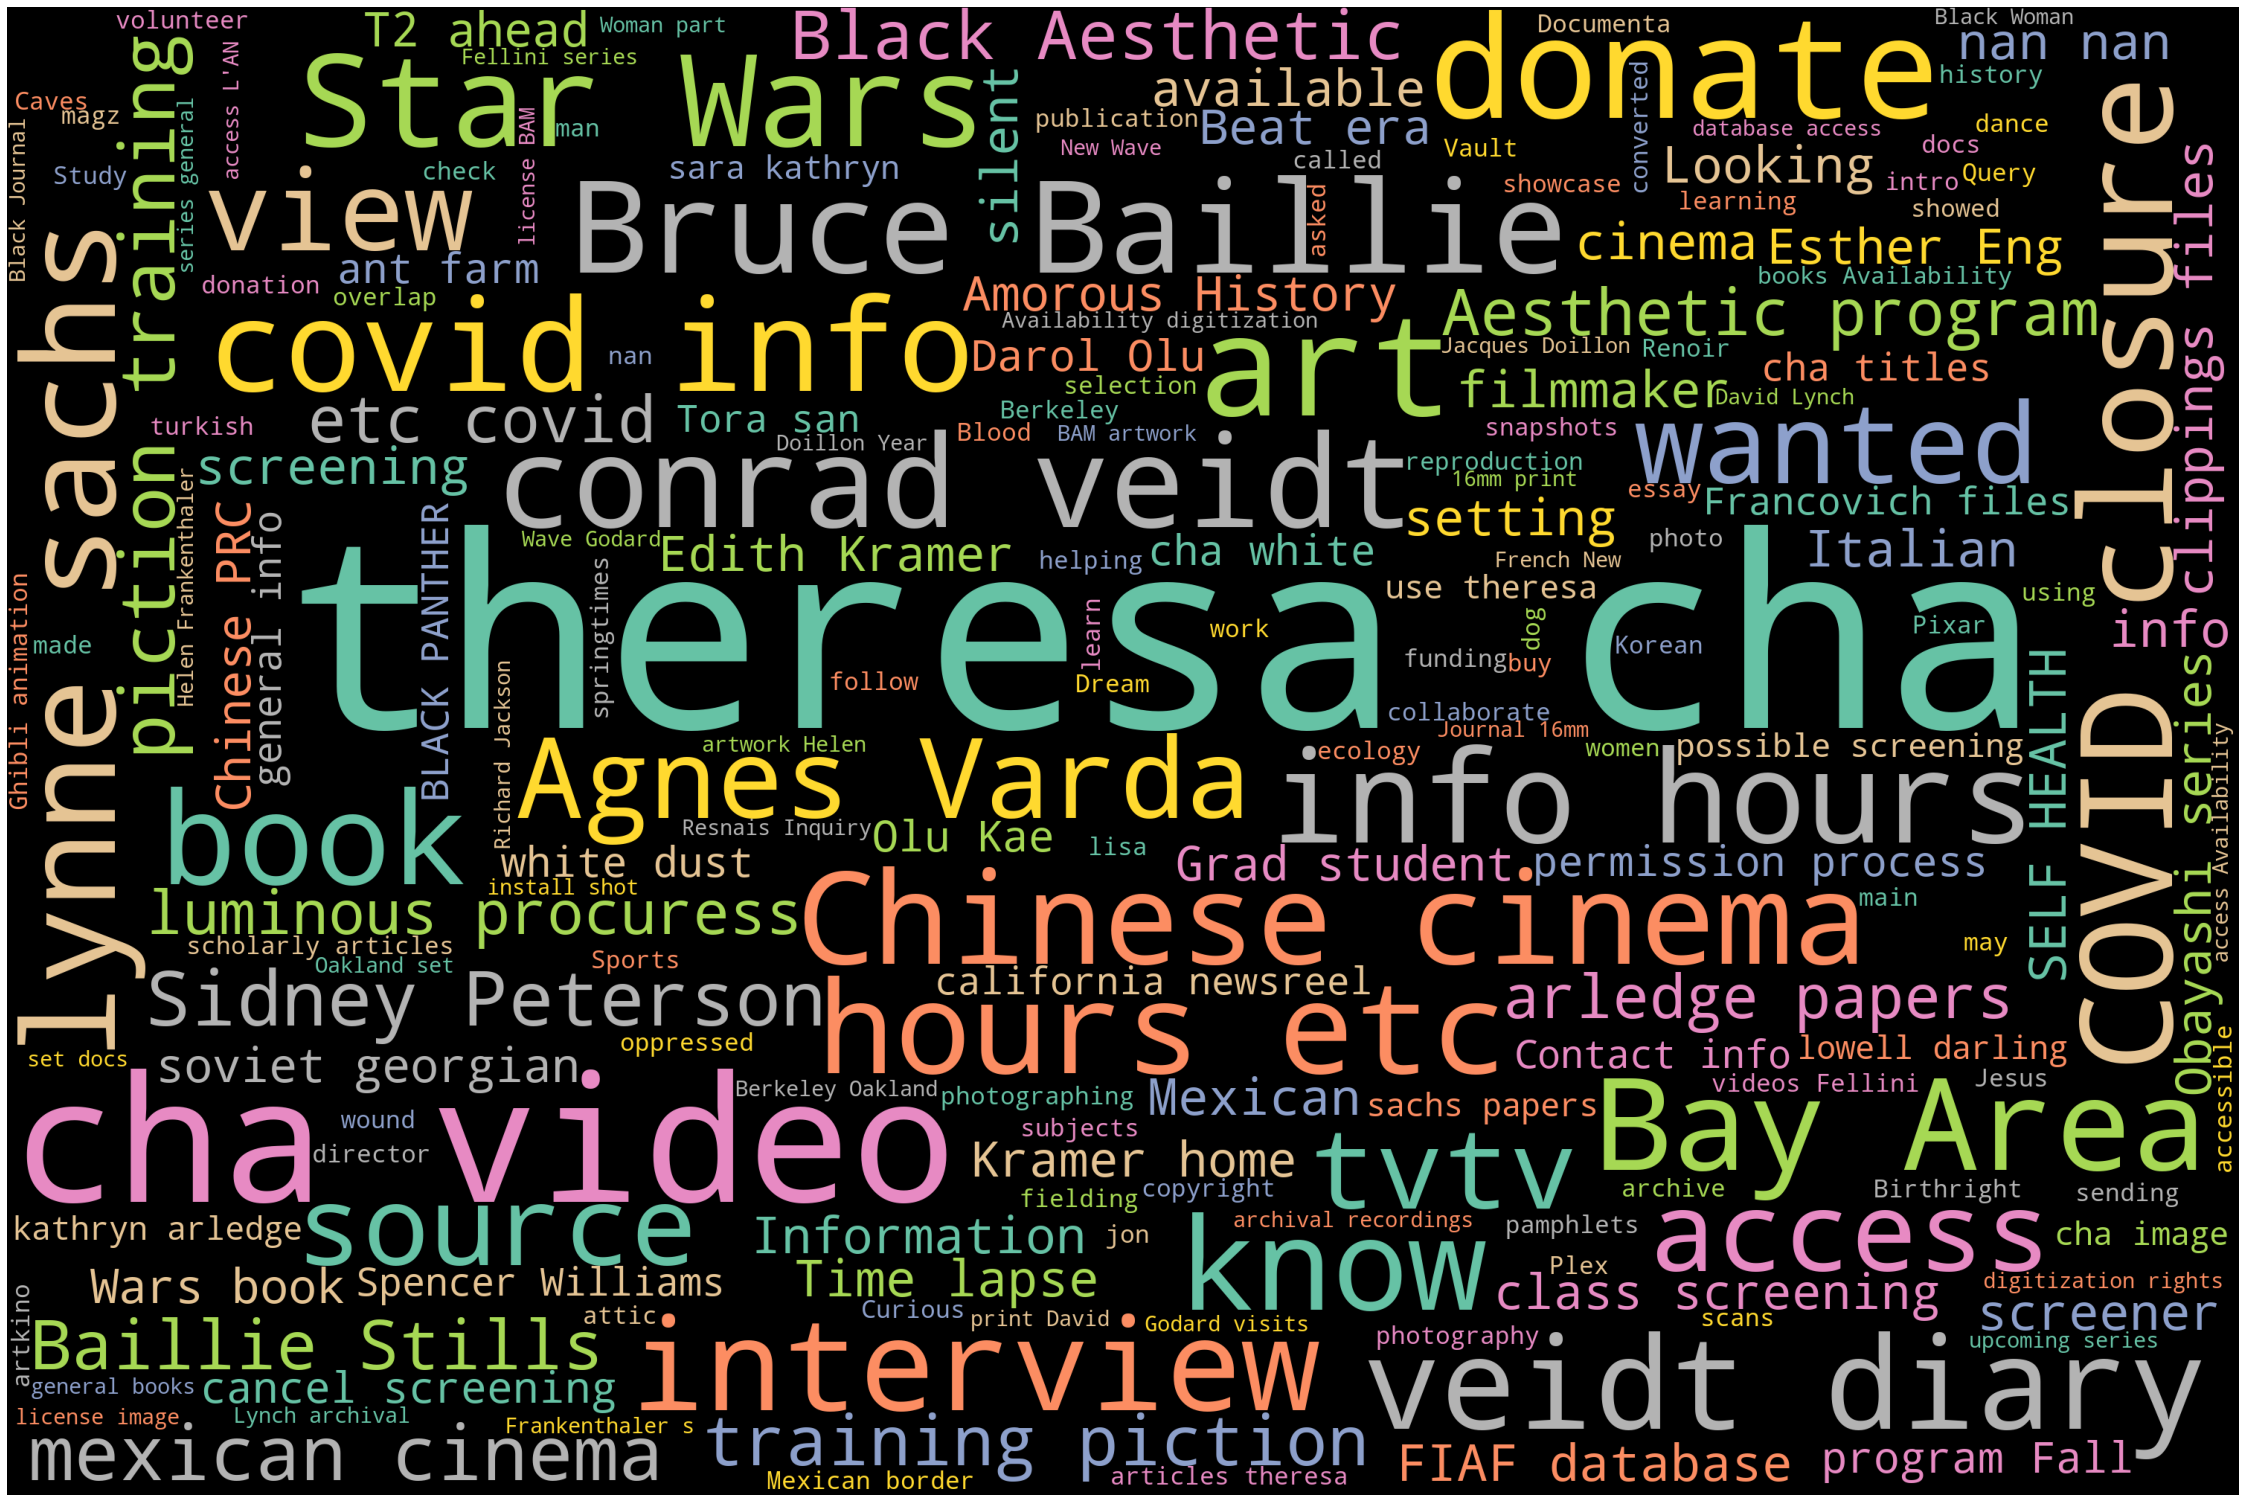

In [10]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

stopwords = set(STOPWORDS)
dont_include = [
    "Doc",
    "ID",
    "want",
    "film",
    "wants",
    "films",
    "interested",
    "collection",
    "Doc ID :",
    "; Doc ID",
    "info on",
    "wants to know",
    "How to access",
    "info on ,",
    ", info on",
    "wants to",
    "Doc ID",
    "ID :",
    "; Doc",
    "interested in",
    "wanted to",
    "of the",
    "collection ;",
    "on ,",
    "; wants",
    ", etc",
    "we have",
    "in the",
    "in what",
    ", info"
]
stopwords.update(dont_include)

# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off")

text = ' '.join(str(i) for i in df['research need'])
wordcloud = WordCloud(
    width = 3000, 
    height = 2000, 
    random_state=1, 
    background_color='black', 
    colormap='Set2',
    collocation_threshold = 4,
    stopwords = stopwords
).generate(text)
plot_cloud(wordcloud)
wordcloud.to_file("research-needs_wordcloud.png")

In [6]:
# taken almost directly from: https://markhneedham.com/blog/2015/01/19/pythonnltk-finding-the-most-common-phrases-in-how-i-met-your-mother/

# from collections import Counter
# import nltk
# from nltk import ngrams

# NLTK stuff, if it's the first time running the toolkit:
# from terminal run 
# >>> nltk.download('stopwords')
# >>> nltk.download('punkt')

# stop_words = set(nltk.corpus.stopwords.words('english'))
# dont_include = [
#     "Doc",
#     "ID",
#     "want",
#     "film",
#     "wants",
#     "films",
#     "interested",
#     "collection",
#     "Doc ID :",
#     "; Doc ID",
#     "info on",
#     "wants to know",
#     "How to access",
#     "info on ,",
#     ", info on",
#     "wants to",
#     "Doc ID",
#     "ID :",
#     "; Doc",
#     "interested in",
#     "wanted to",
#     "of the",
#     "collection ;",
#     "on ,",
#     "; wants",
#     ", etc",
#     "we have",
#     "in the",
#     "in what",
#     ", info"
# ]

# dont_include = [tuple(i.split(' ')) for i in dont_include]
# print(dont_include)
# def extract_phrases(text, phrase_counter, length):
#     for sent in nltk.sent_tokenize(text):
#         words = nltk.word_tokenize(sent)
#         for phrase in ngrams(words, length):
#             if not phrase in dont_include:
#                 phrase_counter[phrase] += 1

# research_needs = df['research need']
# phrase_counter = Counter()

# for i in research_needs:
#     extract_phrases(str(i),phrase_counter,2)
#     extract_phrases(str(i),phrase_counter,3)
# #     extract_phrases(str(i),phrase_counter,4)

# most_common_phrases = phrase_counter.most_common(100)
# phrases_as_string = [(' '.join(k),v) for k,v in most_common_phrases]

# phrases_df = pd.DataFrame(phrases_as_string,columns=['Phrase','Occurrences'])
# phrases_df

# for k,v in most_common_phrases:
#     print('{0: <5}'.format(v), ' '.join(k))
#     print(' '.join(k))